<a href="https://colab.research.google.com/github/alondraSanchezM/sequias-en-Mexico-y-agricultura/blob/main/Machine%20Learning/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sequías en México: evolución a través de los años e implicaciones en la agricultura.** 




## Identificación del problema



Hoy en día, la sequía es uno de los desastres naturales que más daños está provocando entre la población mexicana, principalmente en la zona norte del país. La sequía es una anomalía climatológica, cuya característica principal es la disminución o ausencia de precipitaciones pluviales respecto al índice anual [[1]](http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0186-03482014000200008#notas). México es un país susceptible a las sequías gracias a su ubicación geográfica, ya que cerca del 52% del territorio nacional está catalogado como árido o semiárido y aproximademente un cuarto del mismo siempre experimenta algún grado de sequía anualmente [[2]](https://www.redalyc.org/pdf/102/10203402.pdf).

El proposito de este proyecto es obtener insights, estudiar el impacto para generar una toma de decisisones basada en datos y aplicar modelos de regresión y clasificación con la finalidad de realizar predicciones sobre los datos. 

Los datos para la realización de este proyecto fueron obtenidos de:
* North American Drought Monitor (NADM)
* The Food and Agriculture Organization (FAO)
* Datos abiertos de México

Para más información sobre la recolección y limpieza de los datos visite el Jupyter Notebook de [Procesamiento de datos con Python](https://github.com/alondraSanchezM/sequias-en-Mexico-y-agricultura/tree/main/Procesamiento%20de%20datos%20con%20Python).


[1] http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0186-03482014000200008#notas 

[2] https://www.redalyc.org/pdf/102/10203402.pdf

### Descripción del dataset

Este dataset contienen los siguientes datos en un rango de fecha de Noviembre del 2002 a Junio del 2021.	
* Entidad: Representa el nombre de cada uno de los estados de México.
* Fecha: Fecha de la obtención de los datos.
* Temperatura: Temperatura media mensual del estado. 
* Precipitación: Precipitación promedio. 
* D0 - D4:  Porcentaje de área de cada estado que ha sufrido de cada tipo de sequía en la fecha indicada.
* Area_total_afectada_sequias: Área total afectada por algún tipo de sequía.
* IEA: Índice de estrés agrícola en México.


## Importación de librerías

Las librerías que se utilizarán durante todo el proceso se enumeran y se importan a continuación: 

In [114]:
import requests
url = 'https://raw.githubusercontent.com/alondraSanchezM/sequias-en-Mexico-y-agricultura/main/Machine%20Learning/MLUtilities.py'
r = requests.get(url)

with open ('MLUtilities.py','w') as f:
  f.write(r.text)
##Librería creada
import MLUtilities as utils

In [135]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# ----------------------------------------------------------
## Remplazar estas librerias cuando se importe MLUtils
import sklearn.cluster as cluster
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
# ----------------------------------------------------------


## Algoritmo No Supervisado

Primeramente, realizamos la carga de datos del dataset previamente tratado, que ahora se encuentra limpio y listo para extraer información útil de él.

In [116]:
df=pd.read_csv("https://raw.githubusercontent.com/alondraSanchezM/sequias-en-Mexico-y-agricultura/main/Datasets/Data_Proyecto_clean.csv")
df.head()

,Entidad,Fecha,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA
0,Aguascalientes,2002-11-01,18.000000,19.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Aguascalientes,2002-12-01,14.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Aguascalientes,2003-01-01,12.743166,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Aguascalientes,2003-02-01,15.105630,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Aguascalientes,2003-03-01,16.570585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.482667


Cluster basado en particiones: 

* K-Means (utiliza medias para limitar la influencia de los outliers

* k-Medoids utiliza medianas  limitar la influencia de los outliers
  * PAM [Partitioning Around Medoids]
  * CLARA [Clustering for LARge Applications]  (no son tantos datos [7168 columnas])

usaremos k-means y PAM 
K-means es más sensible a valores atipicos y PAM es más robusto. 


Limpieza de datos


In [117]:
df.dropna(inplace=True)
df = df.drop(columns=['Entidad','Fecha'])

### Clusterización usando las variables Temperatura, Precipitación, D0 - D4, Area_total_afectada_sequias e IEA


Estandarización de datos

In [118]:
std_scaler = StandardScaler()
data_cluster = df.copy()
data_cluster[data_cluster.columns] = std_scaler.fit_transform(data_cluster)
data_cluster.describe()

,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA
count,6.919000e+03,6.919000e+03,6.919000e+03,6.919000e+03,6.919000e+03,6.919000e+03,6.919000e+03,6.919000e+03,6.919000e+03
mean,-9.196446e-16,4.553575e-16,-3.292600e-16,3.072810e-16,-4.257887e-16,1.096038e-15,1.044479e-15,-1.394077e-16,3.802422e-16
std,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00
min,-2.677929e+00,-8.143826e-01,-8.842380e-01,-5.827031e-01,-3.701766e-01,-2.192107e-01,-9.428383e-02,-1.089032e+00,-6.260605e-01
25%,-7.511956e-01,-7.325487e-01,-8.842380e-01,-5.827031e-01,-3.701766e-01,-2.192107e-01,-9.428383e-02,-1.019113e+00,-6.083165e-01
50%,5.466695e-02,-4.098745e-01,-3.149263e-01,-5.730234e-01,-3.701766e-01,-2.192107e-01,-9.428383e-02,-2.547210e-01,-4.474362e-01
75%,8.084126e-01,4.254528e-01,5.298249e-01,2.337014e-01,-3.264650e-01,-2.192107e-01,-9.428383e-02,9.883660e-01,1.674244e-01
max,2.209458e+00,8.000890e+00,3.304957e+00,4.511865e+00,6.406820e+00,1.056833e+01,2.668940e+01,1.529647e+00,4.924726e+00


Reducción de la dimensionalidad: Eliminación de redundancia para eliminar el ruido. Transformación a 2 dimensiones

In [119]:
pca_2 = PCA(2)
pca_2_resultados = pca_2.fit_transform(data_cluster)

Definición de valor de K (número de clusters) utilizando dos métodos para mayor certeza.

In [120]:
# Método del codo
inertia = []
for i in range (1,10):
  kmeans = cluster.KMeans(n_clusters = i, init = "k-means++", random_state=18)
  kmeans.fit(data_cluster)
  inertia.append(kmeans.inertia_)

In [121]:
# Método confirmatorio: método de la silueta
silueta = {}
for i in range(2,10):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++', n_init=15, max_iter=500,random_state=18)
    kmeans.fit(data_cluster)
    silueta[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')

Observación de métodos 

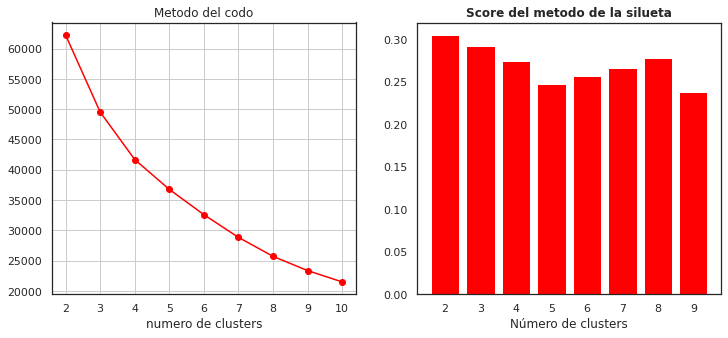

In [122]:
sns.set(style="white", rc={"figure.figsize":(12,5)})
plt.subplot(1,2,1)

plt.plot(range(2,len(inertia)+2), inertia, marker="o", color ="red")
plt.xlabel("numero de clusters")
plt.title("Metodo del codo")
plt.grid(True)

plt.subplot(1,2,2)

plt.bar(range(len(silueta)), list(silueta.values()), align ="center", color ="red")
plt.xticks(range(len(silueta)), list(silueta.keys()))
plt.title("Score del metodo de la silueta", fontweight = "bold")
plt.xlabel("Número de clusters")

plt.show()

Se establece 2 como el número de clusters apropiados 

In [123]:
#Usando 2 clusters 
kmeans = cluster.KMeans(n_clusters=2, random_state=84, init="k-means++")
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroides_pca = pca_2.transform(centroids)

Resumen gráfico:

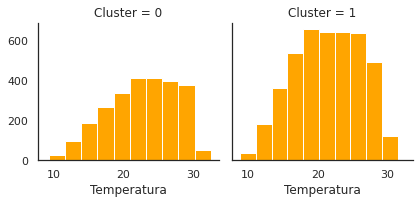

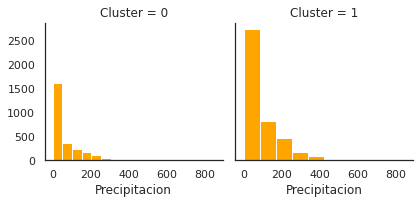

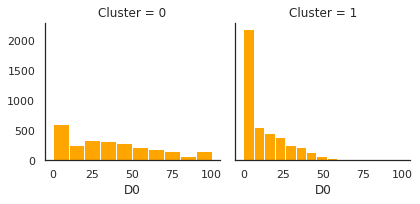

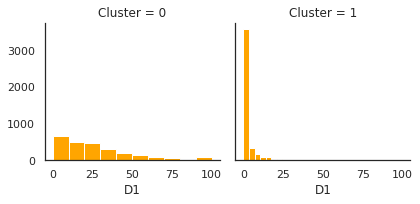

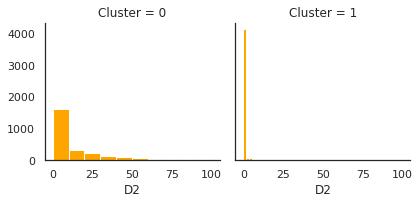

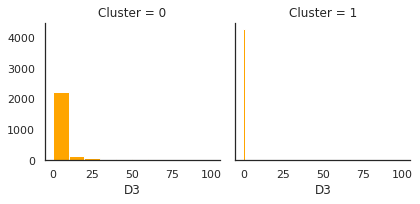

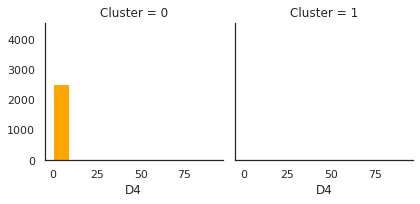

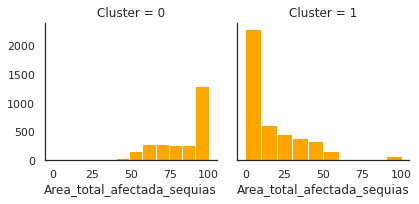

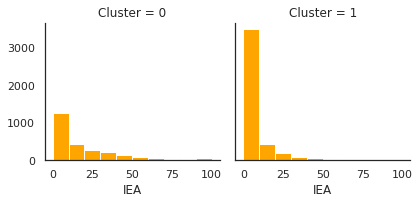

In [124]:
data2= df.copy()
data2["Cluster"] = kmeans_labels

aux = data2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
  grid = sns.FacetGrid(data2,col="Cluster")
  grid.map(plt.hist, cluster, color = "orange")

Cluster en el plano

Text(0, 0.5, 'componente 2')

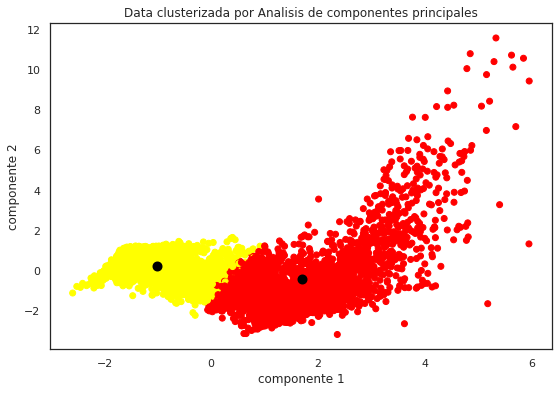

In [125]:
sns.set(style ="white", rc ={"figure.figsize":(9,6)})

plt.scatter(x=pca_2_resultados[:,0], y=pca_2_resultados[:,1], c=kmeans_labels, cmap = "autumn")
plt.scatter(centroides_pca[:,0],centroides_pca[:,1], marker="o", color = "black", linewidths=4, zorder =10)
plt.title("Data clusterizada por Analisis de componentes principales")
plt.xlabel("componente 1")
plt.ylabel("componente 2")

### Clusterización para variables de nivel de sequía: D0, D1, D2, D3 y D4



Debido a que la clusterización anterior no nos pareció apropiada, se decidió realizar la clusterización unicamente utilizando las variables que representan el nivel de sequía.

In [138]:
#Lectura de datos
data = pd.read_csv("https://raw.githubusercontent.com/alondraSanchezM/sequias-en-Mexico-y-agricultura/main/Datasets/Data_Proyecto_clean.csv")
data.head()

,Entidad,Fecha,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA
0,Aguascalientes,2002-11-01,18.000000,19.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Aguascalientes,2002-12-01,14.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Aguascalientes,2003-01-01,12.743166,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Aguascalientes,2003-02-01,15.105630,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Aguascalientes,2003-03-01,16.570585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.482667


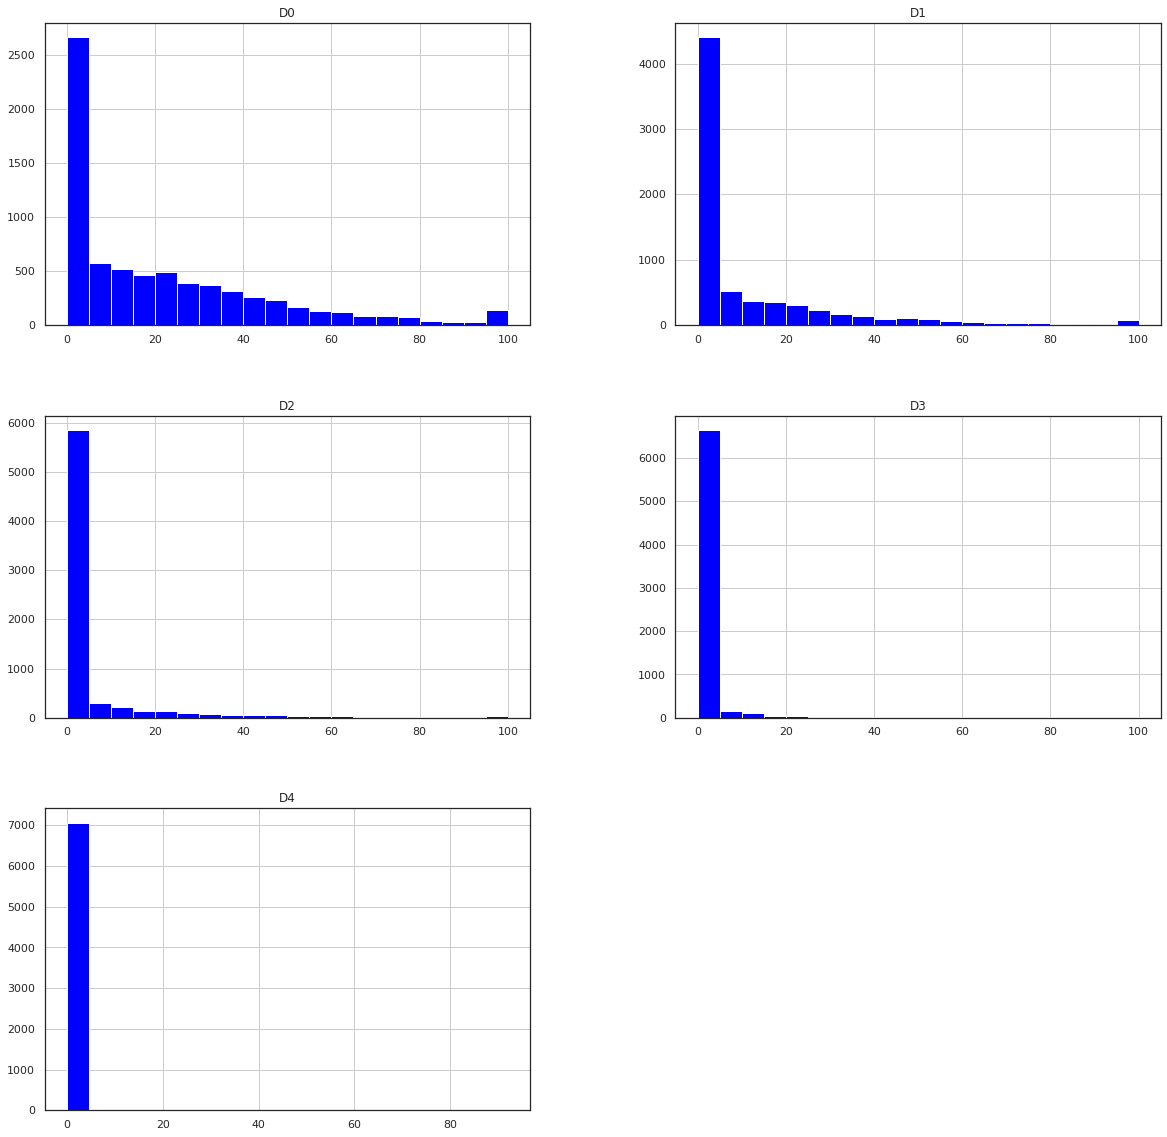

In [139]:
# Visualización de distribución de variables
data = data.drop(columns=['Entidad','Fecha','Temperatura', 'Precipitacion', 'Area_total_afectada_sequias', 'IEA'])
data = data.dropna()
sns.set(style='white', rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20, color='blue')

In [140]:
# Reparametrización de datos
std_scaler = StandardScaler()
data_cluster = data.copy()
data_cluster[data_cluster.columns] = std_scaler.fit_transform(data_cluster)

In [141]:
# Visualización de las propiedades de las variables reparametrizadas
data_cluster.describe()

,D0,D1,D2,D3,D4
count,7.168000e+03,7.168000e+03,7.168000e+03,7.168000e+03,7.168000e+03
mean,-1.612170e-16,-3.212026e-16,-1.024672e-15,8.132755e-16,-1.775005e-15
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,-8.733319e-01,-5.759992e-01,-3.660004e-01,-2.157238e-01,-9.261745e-02
25%,-8.733319e-01,-5.759992e-01,-3.660004e-01,-2.157238e-01,-9.261745e-02
50%,-3.256272e-01,-5.742385e-01,-3.660004e-01,-2.157238e-01,-9.261745e-02
75%,5.217805e-01,2.204986e-01,-3.390388e-01,-2.157238e-01,-9.261745e-02
max,3.246297e+00,4.454778e+00,6.374405e+00,1.065842e+01,2.716455e+01


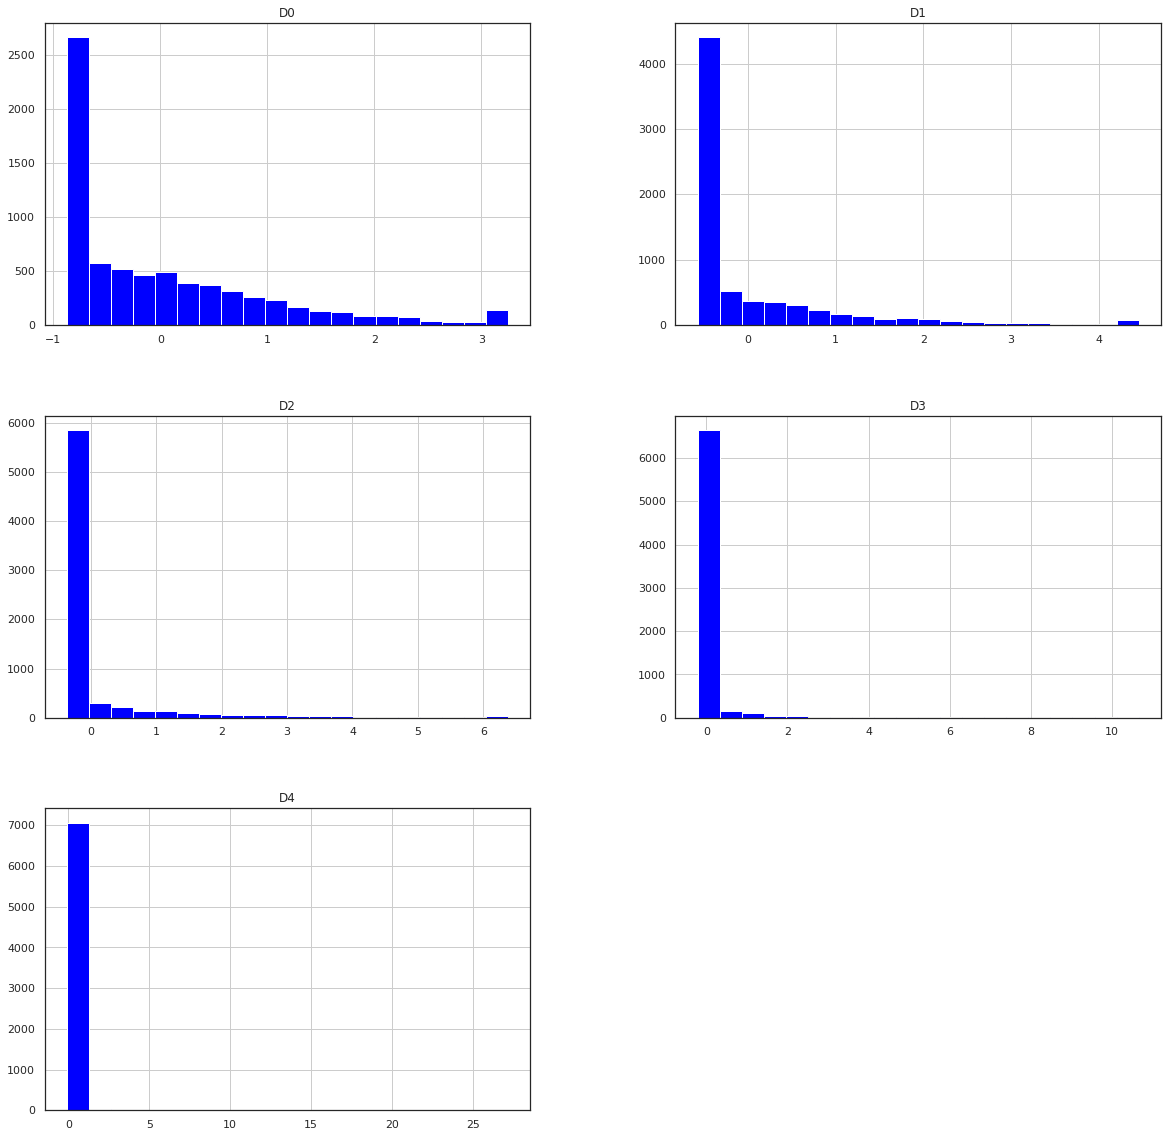

In [142]:
# Visualización de distribución de variables reparametrizadas
sns.set(style='white', rc={'figure.figsize':(20,20)})
ax=data_cluster.hist(bins=20, color='blue')

In [143]:
# Descomposición de variables en dos dimensiones
pca_2 = PCA(2) #Para reducir a dos dimensiones 
pca_2_resultados = pca_2.fit_transform(data_cluster)

In [144]:
# Cálculo de la varianza acumulada
print('Varianza acumulada por dos nuevas variables: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Varianza acumulada por dos nuevas variables: 54.67%


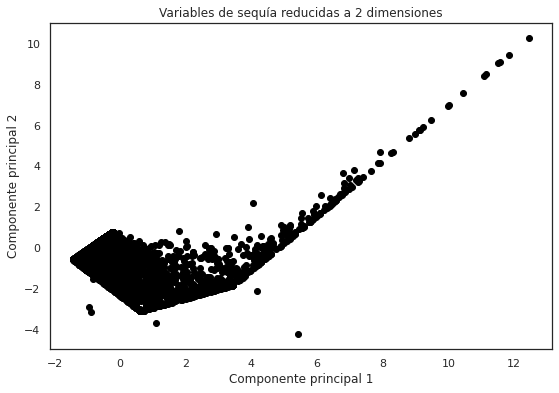

In [145]:
sns.set(style="white", rc={'figure.figsize':(9,6)})
plt.scatter(x=pca_2_resultados[:,0], y=pca_2_resultados[:,1], color='black')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Variables de sequía reducidas a 2 dimensiones')
plt.show()

In [146]:
# Generación de clusterización
inertia = []
for i in range(1,10):
  kmeans = cluster.KMeans(n_clusters = i, init = 'k-means++', random_state = 18)
  kmeans.fit(data_cluster)
  inertia.append(kmeans.inertia_)

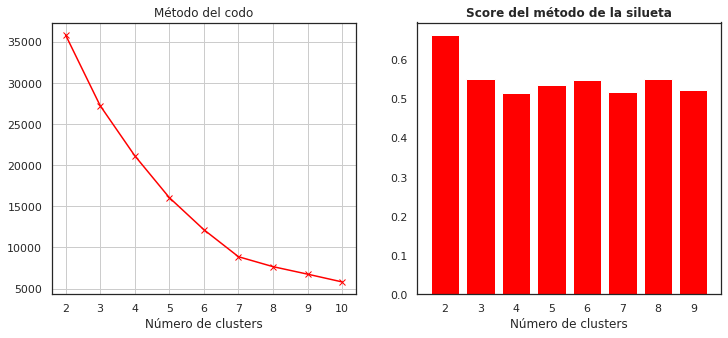

In [147]:
# Método de confirmación: Método del codo
sns.set(style = 'white', rc = {'figure.figsize':(12,5)})
plt.subplot(1,2,1)
plt. plot(range(2, len(inertia)+2), inertia, marker = 'x', color = 'red')
plt.xlabel('Número de clusters')
plt.title('Método del codo')
plt.grid(True)

# Método de confirmación: Método de la silueta
silueta = {}
for i in range(2,10):
  kmeans = cluster.KMeans(n_clusters = i, init = "k-means++", random_state = 18, n_init = 15, max_iter = 500)
  kmeans.fit(data_cluster)
  silueta[i] = silhouette_score(data_cluster, kmeans.labels_, metric = 'euclidean')

plt.subplot(1,2,2)
plt. bar(range(len(silueta)), list(silueta.values()), align = 'center', color = 'red')
plt.xticks(range(len(silueta)), list(silueta.keys()))
plt.title('Score del método de la silueta', fontweight = 'bold')
plt.xlabel('Número de clusters')

plt.show()

Al observar la gráfica del Método del codo, se podría pensar que el número ideal de cluster sería de 7. Sin embargo, al analizar la gráfica del Método de la silueta, esta nos indica que 2 es el número ideal. 
Se sabe que deberían ser 5 categorías las que tengamos en nuestros datos (D0, D1, D2, D3 y D4), por lo que se procederá a intentar las tres opciones.

Text(0, 0.5, 'componente 2')

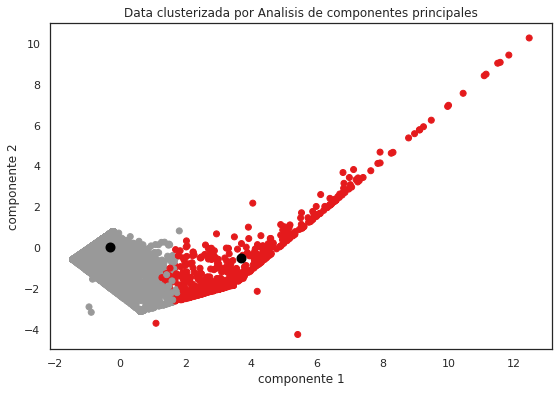

In [148]:
# Clusterización: Número de clusters = 2
K = 2
kmeans = cluster.KMeans(n_clusters = K, random_state = 7, init = "k-means++")
kmeans_labels = kmeans.fit_predict(data_cluster)

centroides = kmeans.cluster_centers_
centroides_pca = pca_2.transform(centroides)

data2 = data.copy()
data2['Cluster'] = kmeans_labels

sns.set(style ="white", rc ={"figure.figsize":(9,6)})
plt.scatter(x=pca_2_resultados[:,0], y=pca_2_resultados[:,1], c=kmeans_labels, cmap = "Set1")
plt.scatter(centroides_pca[:,0],centroides_pca[:,1], marker="o", color = "black", linewidths=4, zorder =10)
plt.title("Data clusterizada por Analisis de componentes principales")
plt.xlabel("componente 1")
plt.ylabel("componente 2")

Text(0, 0.5, 'componente 2')

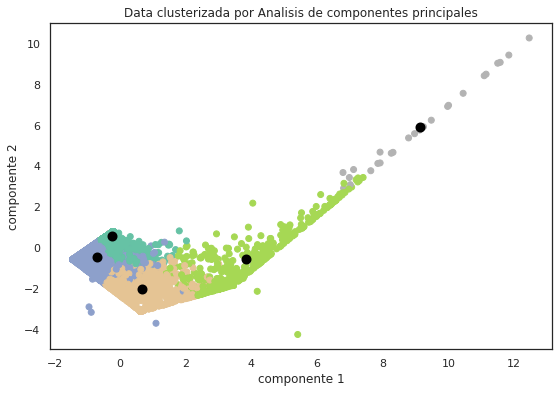

In [149]:
# Clusterización: Número de clusters = 5
K = 5
kmeans = cluster.KMeans(n_clusters = K, random_state = 7, init = "k-means++")
kmeans_labels = kmeans.fit_predict(data_cluster)

centroides = kmeans.cluster_centers_
centroides_pca = pca_2.transform(centroides)

data2 = data.copy()
data2['Cluster'] = kmeans_labels

sns.set(style ="white", rc ={"figure.figsize":(9,6)})
plt.scatter(x=pca_2_resultados[:,0], y=pca_2_resultados[:,1], c=kmeans_labels, cmap = "Set2")
plt.scatter(centroides_pca[:,0],centroides_pca[:,1], marker="o", color = "black", linewidths=4, zorder =10)
plt.title("Data clusterizada por Analisis de componentes principales")
plt.xlabel("componente 1")
plt.ylabel("componente 2")

Text(0, 0.5, 'componente 2')

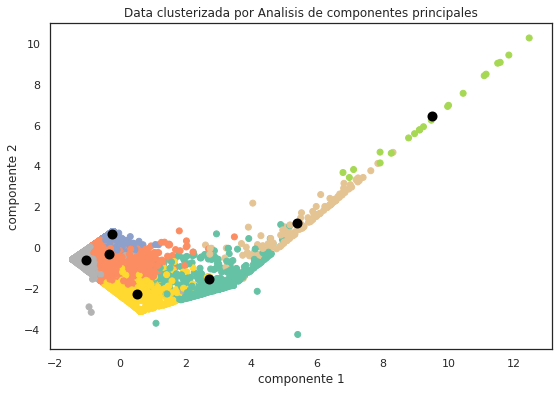

In [150]:
# Clusterización: Número de clusters = 7
K = 7
kmeans = cluster.KMeans(n_clusters = K, random_state = 7, init = "k-means++")
kmeans_labels = kmeans.fit_predict(data_cluster)

centroides = kmeans.cluster_centers_
centroides_pca = pca_2.transform(centroides)

data2 = data.copy()
data2['Cluster'] = kmeans_labels

sns.set(style ="white", rc ={"figure.figsize":(9,6)})
plt.scatter(x=pca_2_resultados[:,0], y=pca_2_resultados[:,1], c=kmeans_labels, cmap = "Set2")
plt.scatter(centroides_pca[:,0],centroides_pca[:,1], marker="o", color = "black", linewidths=4, zorder =10)
plt.title("Data clusterizada por Analisis de componentes principales")
plt.xlabel("componente 1")
plt.ylabel("componente 2")

## Problemas de regresión

### Predicciones de IEA con D0 - D4

Primeramente, realizamos la carga de datos del dataset previamente tratado, que ahora se encuentra limpio y listo para extraer información útil de él.

In [151]:
df = pd.read_csv("https://raw.githubusercontent.com/alondraSanchezM/sequias-en-Mexico-y-agricultura/main/Datasets/Data_Proyecto_clean.csv")
df.head()

,Entidad,Fecha,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA
0,Aguascalientes,2002-11-01,18.000000,19.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Aguascalientes,2002-12-01,14.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Aguascalientes,2003-01-01,12.743166,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Aguascalientes,2003-02-01,15.105630,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Aguascalientes,2003-03-01,16.570585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.482667


In [152]:
# Limpiando NaN en el IEA
df = df.dropna()

In [153]:
X = df[["D0","D1","D2","D3","D4"]]
Y = df["IEA"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5189, 5)
(1730, 5)
(5189,)
(1730,)


In [154]:
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
modelo.score(X_test,Y_test)

0.10755359957050659

### Predicciones de IEA con Temperatura y Precipitaciones

En este caso nuestra variable a predecir va a ser el índice de estrés agrícola,
a partir de los datos de precipitación y temperatura.

A continuación vamos a dividir los datos en Train y Test y entrenaremos un regresor lineal para obtener una predicción sobre la variable IEA.

In [156]:
X = df[['Precipitacion', 'Temperatura']]
Y = df['IEA']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)


In [157]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)  
print(Y_test.shape)

(5535, 2)
(1384, 2)
(5535,)
(1384,)


In [158]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =309.53931383944536
Pruebas: MSE =328.7893586062432


In [160]:
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion,diferencia
0,10.620333,15.581406,-4.961073
1,0.874000,15.737661,-14.863661
2,2.495667,3.391256,-0.895589
3,9.645667,14.173935,-4.528268
4,22.102000,14.291283,7.810717
5,11.980000,7.912125,4.067875
6,21.889000,13.723560,8.165440
7,1.613333,11.869646,-10.256312
8,1.635000,10.073237,-8.438237
9,100.000000,12.490101,87.509899


In [161]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =306.08066493626416
Pruebas: MSE =325.74778893015946


,valor_real,prediccion,diferencia
0,10.620333,16.988143,-6.367810
1,0.874000,17.322260,-16.448260
2,2.495667,3.081760,-0.586093
3,9.645667,14.348632,-4.702965
4,22.102000,15.242919,6.859081
5,11.980000,6.190485,5.789515
6,21.889000,13.783823,8.105177
7,1.613333,11.534428,-9.921095
8,1.635000,9.116597,-7.481597
9,100.000000,13.186451,86.813549


## Bitácora de experimentos

**Experimento 1**

* Fecha: 18/Oct/2021 1:00 a.m.

* Algoritmo: Regresión 

* Dataset: Data_Proyecto_clean.csv

Configuración:
* test_size = 0.25
* random_state = 5
* regresión lineal 

Resultados:


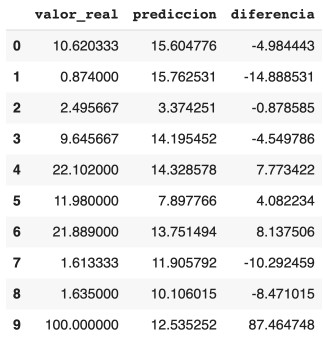

**Experimento 2**

* Fecha: 18/Oct/2021 1:30 a.m.

* Algoritmo: Regresión

* Dataset: Data_Proyecto_clean.csv

Configuración:

* test_size = 0.4

* regresión lineal

* random_state = 5

Resultados:
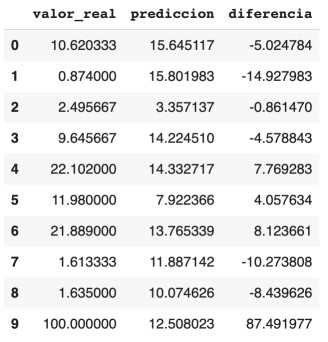


**Experimento 3**

* Fecha: 18/Oct/2021 1:00 a.m.

* Algoritmo: Regresión

* Dataset: Data_Proyecto_clean.csv

Configuración:

* test_size = 0.25

* regresión polinomial grado 2

* random_state = 5

Resultados:

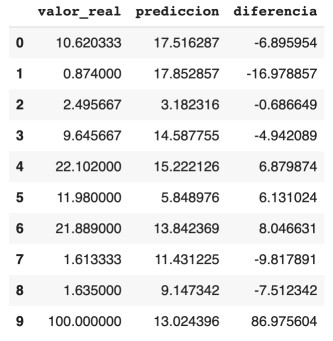


Con los resultados anteriores podemos observar que una regresión no lineal no nos está mejorando las predicciones sino al contrario.

**Experimento 4**

* Fecha: 18/Oct/2021 1:00 a.m.

* Algoritmo: Regresión

* Dataset: Data_Proyecto_clean.csv

Configuración:

* test_size = 0.2

* regresión lineal

* random_state = 5

Resultados:

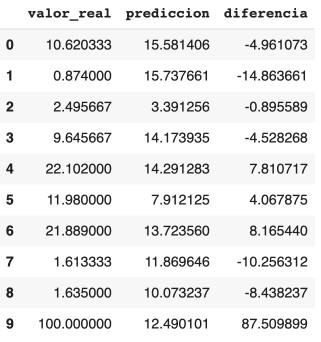